# K nearest Allgorithm
* Used to predict something in non linear data set

* K-nearest neighbour means, it will see the k number of nearest neaghbour and will give the class which has more frequncy to the new element
* 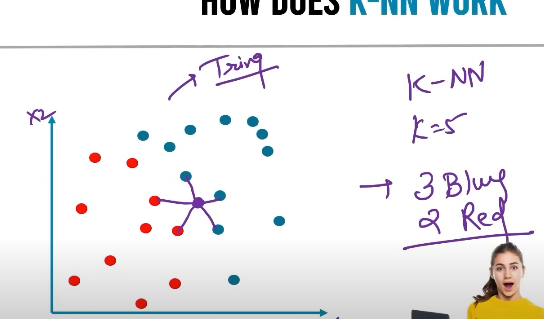
* Here in this case the new point will be assigned Bue color

* Its is called **Lazy Learner Algo** Because it has to find the distance of rest all element anf pick the k nearst element
* i.e first calculate all elements distance and than pick the k number of nearst element
* So this processs will take lot of time hence it is called laxy learner algo

**Ways to calculate distance**
1) Manhattan Distance
2) Euclidian Distance
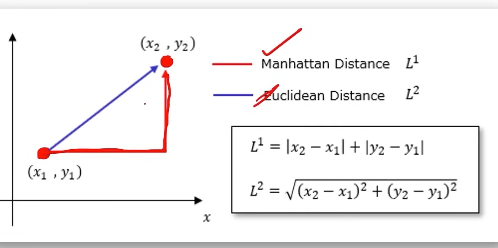

* Manhattan Distance calculates the two way path i.e no diagonal passing
* Euclidian : can go diagonal So the formula depicts the pythagorous 

**How to deside k value**
* This is a hyper parameter
* Do iteration and check
* Ideal case k=5 is best

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv(r"D:\Data Science\Datasets\Social_Network_Ads.csv")
data.drop(columns=['User ID','Gender'], inplace=True)

In [16]:
data.head(4)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0


In [12]:
data.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [21]:
x = data.iloc[:,:-1]
y = data['Purchased']

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

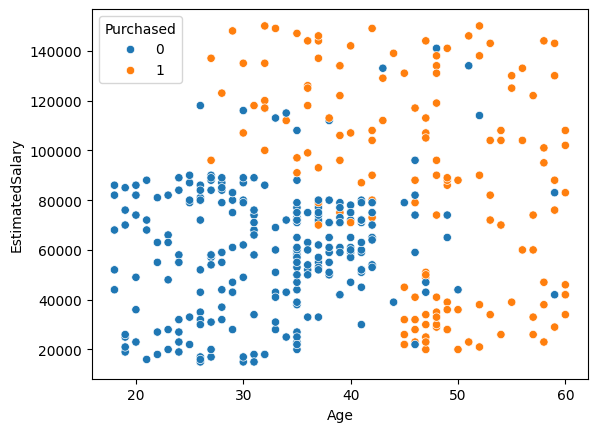

In [14]:
sns.scatterplot(x = 'Age', y='EstimatedSalary', hue='Purchased', data=data)

As Age value and Salary values are not identical. So we will do sacling

In [6]:
from sklearn.preprocessing import StandardScaler

In [22]:
sc = StandardScaler()
sc.fit(x) #We are only passing x beacuse x contains all the columsn that has to be scaled
x = pd.DataFrame(sc.transform(x), columns = x.columns)

In [23]:
x.head(3)

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

* So here we need to pass EstimatedSalary and Age so it will find k neaste anf tell us wether purchased or not

In [26]:
from sklearn.neighbors import KNeighborsClassifier #classifier because data is of classifficatio (0and 1)

In [27]:
knn = KNeighborsClassifier(n_neighbors=5,p=1) #Were p =1 for Manhatton distance
knn.fit(x_train , y_train)

KNeighborsClassifier(p=1)

In [28]:
knn.score(x_test, y_test)

0.925

In [30]:
knn.score(x_train, y_train) #Checking fro this because to see weather it is overfitted or not 

0.9125

* Insted do iteration over the n_neighbors to seee the best one

In [35]:
for i in range(1,20):
    knn1 = KNeighborsClassifier(n_neighbors=i)
    knn1.fit(x_train, y_train)
    print('For Train=', knn1.score(x_train, y_train), ' - For test=', knn1.score(x_test, y_test), 'At k=', i, 'Woth difference =',abs(knn1.score(x_test, y_test)-knn1.score(x_train, y_train)) )

For Train= 0.996875  - For test= 0.85 At k= 1 Woth difference = 0.14687499999999998
For Train= 0.915625  - For test= 0.8625 At k= 2 Woth difference = 0.05312499999999998
For Train= 0.925  - For test= 0.9125 At k= 3 Woth difference = 0.012500000000000067
For Train= 0.91875  - For test= 0.925 At k= 4 Woth difference = 0.006250000000000089
For Train= 0.909375  - For test= 0.925 At k= 5 Woth difference = 0.015625
For Train= 0.909375  - For test= 0.9 At k= 6 Woth difference = 0.009375000000000022
For Train= 0.91875  - For test= 0.9375 At k= 7 Woth difference = 0.018750000000000044
For Train= 0.90625  - For test= 0.925 At k= 8 Woth difference = 0.018750000000000044
For Train= 0.9125  - For test= 0.9375 At k= 9 Woth difference = 0.025000000000000022
For Train= 0.90625  - For test= 0.925 At k= 10 Woth difference = 0.018750000000000044
For Train= 0.909375  - For test= 0.925 At k= 11 Woth difference = 0.015625
For Train= 0.9125  - For test= 0.925 At k= 12 Woth difference = 0.012500000000000067
F

Now we will predict something  
Note: you should pass scaling data while predicting something

In [ ]:
19	19000	

In [43]:
new = sc.transform([[22,125000]])

C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [44]:
knn.predict(new)

C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

**Check for disicion boundary**

In [45]:
from mlxtend.plotting import plot_decision_regions

C:\Users\Harsh Narayankar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


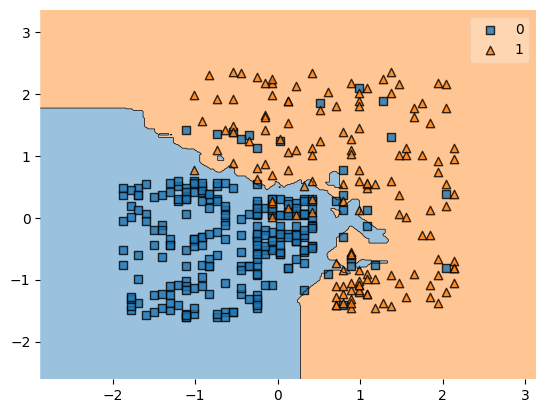

In [48]:
plot_decision_regions(x.to_numpy(), y.to_numpy(), clf=knn)
plt.show()